# Lecture 8:
- Image Compression with low-rank matrix approximation via SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

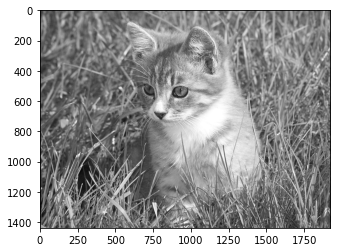

In [2]:
A = io.imread('kitty-cat.jpg')  # read the color image
A = color.rgb2gray(A)   # grayscale 0 - 1, 0 represents black, 1 represents white
plt.imshow(A, cmap='gray')
plt.show()

In [4]:
A.shape

(1439, 1920)

In [5]:
U, D, Vh = np.linalg.svd(A)  # full SVD
print("Size of U:", U.shape)
print("Size of D:", D.shape)
print("Size of Vh:", Vh.shape)

Size of U: (1439, 1439)
Size of D: (1439,)
Size of Vh: (1920, 1920)


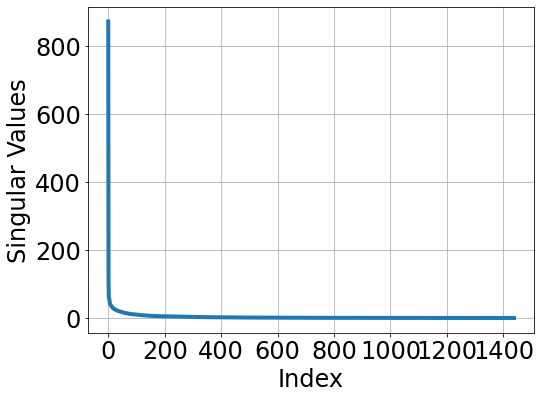

In [6]:
# Plot singular values
plt.figure(figsize=(8, 6))
plt.plot(D, linewidth=4)
plt.ylabel('Singular Values', fontsize=24)
plt.xlabel('Index', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True)
plt.show()

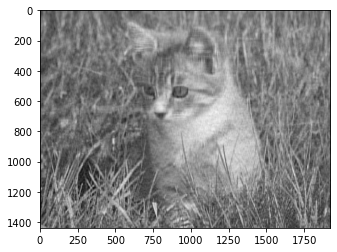

In [10]:
# low rank approximation
r = 50  # pick a rank r < min(m,n)

Ur = U[:, :r]
Vhr = Vh[:r, :]
Dr = np.diag(D[:r])

Ar = Ur@Dr@Vhr

plt.imshow(Ar, cmap='gray')
plt.show()


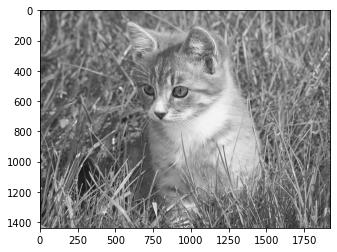

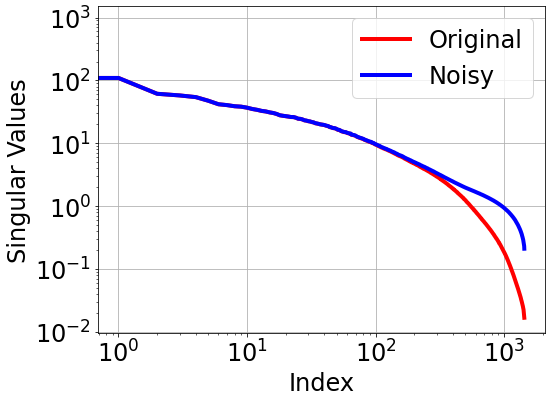

In [11]:
# Compare the singular values of the original image and a noisy one
A_n = A + 0.1 * (np.random.rand(*A.shape) - 0.5)
plt.imshow(A_n, cmap='gray')
plt.show()

U_n, D_n, Vh_n = np.linalg.svd(A_n)

plt.figure(figsize=(8, 6))
plt.loglog(D, 'r', linewidth=4)
plt.loglog(D_n, 'b', linewidth=4)
plt.legend(['Original', 'Noisy'], fontsize=24)
plt.ylabel('Singular Values', fontsize=24)
plt.xlabel('Index', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True)
plt.show()

In [ ]:
8